# Oman Road Traffic Accidents (RTA) Analysis in R

# Using Time Series


***
## 1. Data Extraction

In [1]:
# @author: Aamir M. Khan
# Created First: April 2 2019
# Updated Last:

### Import Libraries

In [2]:
library(reshape2)
library(ggplot2)
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   0.8.1
v readr   1.3.1     v stringr 1.4.0
v tibble  2.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Load Data Files

In [3]:
data <- read.csv("../data/fatalities.csv")
head(data,3)

Year,January,February,March,April,May,June,July,August,September,Octobar,November,December
2000,56,38,49,38,31,43,61,24,23,52,32,45
2001,40,35,41,27,36,47,40,40,47,60,28,58
2002,46,56,30,86,38,59,42,55,35,45,45,43


In [4]:
dim(data)

[1] 19 13

In [5]:
class(data)

[1] "data.frame"

### Formatting the Data

In [6]:
fatalities = melt(data, id='Year', variable.name='Month', value.name='Value')
head(fatalities,5)

Year,Month,Value
2000,January,56
2001,January,40
2002,January,46
2003,January,70
2004,January,45


In [7]:
fatalities$Month <- as.integer(factor(fatalities$Month, levels = unique(fatalities$Month)))
fatalities = na.omit(fatalities)
fatalities$Time <- as.Date(sprintf("%d-%02d-%02d", fatalities$Year, fatalities$Month,1))
fatalities <- fatalities[c('Time','Value')]
fatalities <- fatalities[order(fatalities$Time),]
rownames(fatalities) <- NULL
head(fatalities,5)

Time,Value
2000-01-01,56
2000-02-01,38
2000-03-01,49
2000-04-01,38
2000-05-01,31


In [8]:
fatalities$Year <- format(fatalities$Time, "%Y")

In [9]:
str(fatalities)

'data.frame':	228 obs. of  3 variables:
 $ Time : Date, format: "2000-01-01" "2000-02-01" ...
 $ Value: int  56 38 49 38 31 43 61 24 23 52 ...
 $ Year : chr  "2000" "2000" "2000" "2000" ...


In [10]:
seq(2000, 2018, by=3)

[1] 2000 2003 2006 2009 2012 2015 2018

### Time Series of Road Traffic Accidents

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


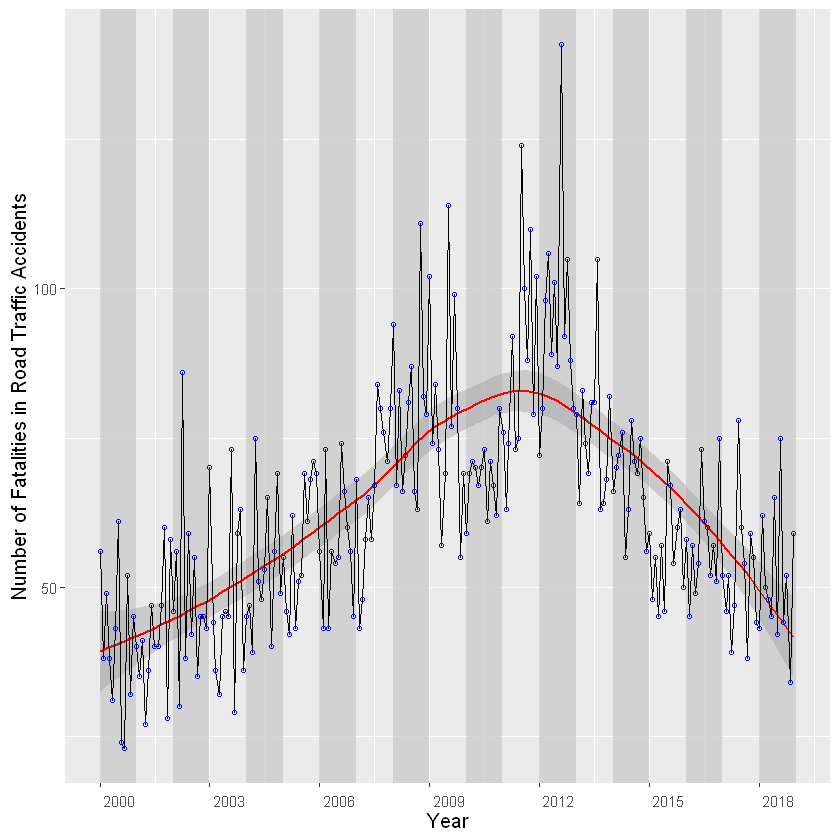

In [15]:
xmin <- seq(2000,2018,2)
xlbl1 <- seq(as.Date("2000-01-01"), as.Date("2018-12-01"), by="3 years")
xlbl2 <- seq(2000, 2018, by=3)
p <- ggplot() +
    geom_rect(data=data.frame(xmin), aes(xmin=as.Date(paste0(xmin,"-01-01")), 
                                 xmax=as.Date(paste0(xmin,"-12-31")), 
                                 ymin=-Inf, ymax=+Inf), 
            fill='gray80', alpha=0.8) +
    geom_smooth(data=fatalities, aes(x=Time, y=Value), col='red', size=0.7) +
    geom_line(data=fatalities, aes(x=Time, y=Value), size=0.5) +
    geom_point(data=fatalities, aes(x=Time, y=Value), shape=1, col='blue', size=1) +
    #ggtitle("Road Traffic Deaths in Oman from 2000 to 2018") +
    labs(x='Year', y='Number of Fatalities in Road Traffic Accidents') +
    scale_x_date(breaks = as.Date(xlbl1),labels = xlbl2) +
    theme_grey() +
    theme(
        #plot.title = element_text(color="blue", size=14, face="bold.italic",hjust = 0.5),
        axis.title.x = element_text(size=12),
        axis.text.x = element_text(lineheight = 0, angle = 0, vjust=0, hjust=-0.1),
        axis.title.y = element_text(size=12)
    )
p

In [16]:
ggsave('Fatalities_Ts.png', p, device='png', dpi=1200, limitsize=FALSE)

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


### Decomposition of Time Series Data

In [17]:
# transpose and convert to vector form
datav <- as.vector(t(data[,-1]))
datav

[1]  56  38  49  38  31  43  61  24  23  52  32  45  40  35  41  27  36  47
 [19]  40  40  47  60  28  58  46  56  30  86  38  59  42  55  35  45  45  43
 [37]  70  44  36  32  45  46  45  73  29  59  63  36  45  47  39  75  51  48
 [55]  53  65  40  56  69  49  55  46  42  62  43  51  52  69  61  68  71  69
 [73]  56  43  73  43  56  54  55  74  66  60  56  45  68  43  48  58  65  58
 [91]  67  84  80  76  71  80  94  67  83  66  72  81  87  66  63 111  82  79
[109] 102  74  84  73  57  69 114  77  99  80  55  69  59  69  71  70  67  70
[127]  73  61  71  67  62  80  76  63  74  92  73  75 124 100  88 110  79 102
[145]  72  80  98 106  89 101  87 141  92 105  88  80  79  64  83  74  69  81
[163]  81 105  63  64  68  82  66  70  72  76  55  63  78  71  69  75  65  56
[181]  59  48  55  45  57  46  71  67  54  60  63  50  58  45  57  49  54  73
[199]  61  60  52  57  51  75  52  46  52  39  47  78  60  54  38  59  55  44
[217]  43  62  50  48  45  65  42  75  44  52  34  59

In [18]:
# create time series from data
data_ts <- ts(datav,frequency=12, start=c(2000,1))

In [19]:
summary(data_ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   47.00   60.50   62.33   73.00  141.00 

In [20]:
print(data_ts)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2000  56  38  49  38  31  43  61  24  23  52  32  45
2001  40  35  41  27  36  47  40  40  47  60  28  58
2002  46  56  30  86  38  59  42  55  35  45  45  43
2003  70  44  36  32  45  46  45  73  29  59  63  36
2004  45  47  39  75  51  48  53  65  40  56  69  49
2005  55  46  42  62  43  51  52  69  61  68  71  69
2006  56  43  73  43  56  54  55  74  66  60  56  45
2007  68  43  48  58  65  58  67  84  80  76  71  80
2008  94  67  83  66  72  81  87  66  63 111  82  79
2009 102  74  84  73  57  69 114  77  99  80  55  69
2010  59  69  71  70  67  70  73  61  71  67  62  80
2011  76  63  74  92  73  75 124 100  88 110  79 102
2012  72  80  98 106  89 101  87 141  92 105  88  80
2013  79  64  83  74  69  81  81 105  63  64  68  82
2014  66  70  72  76  55  63  78  71  69  75  65  56
2015  59  48  55  45  57  46  71  67  54  60  63  50
2016  58  45  57  49  54  73  61  60  52  57  51  75
2017  52  46  52  39  47  78  60  54  38  59  

In [21]:
# decompose seasonal time series data: original, seasonal, trend, random
fitF <- decompose(data_ts)
fitF

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2000  56  38  49  38  31  43  61  24  23  52  32  45
2001  40  35  41  27  36  47  40  40  47  60  28  58
2002  46  56  30  86  38  59  42  55  35  45  45  43
2003  70  44  36  32  45  46  45  73  29  59  63  36
2004  45  47  39  75  51  48  53  65  40  56  69  49
2005  55  46  42  62  43  51  52  69  61  68  71  69
2006  56  43  73  43  56  54  55  74  66  60  56  45
2007  68  43  48  58  65  58  67  84  80  76  71  80
2008  94  67  83  66  72  81  87  66  63 111  82  79
2009 102  74  84  73  57  69 114  77  99  80  55  69
2010  59  69  71  70  67  70  73  61  71  67  62  80
2011  76  63  74  92  73  75 124 100  88 110  79 102
2012  72  80  98 106  89 101  87 141  92 105  88  80
2013  79  64  83  74  69  81  81 105  63  64  68  82
2014  66  70  72  76  55  63  78  71  69  75  65  56
2015  59  48  55  45  57  46  71  67  54  60  63  50
2016  58  45  57  49  54  73  61  60  52  57  51  75
2017  52  46  52  39  47  78  60  54  38  5

In [22]:
Time = attributes(data_ts)[[1]]
Time = seq(Time[1],Time[2], length.out=(Time[2]-Time[1])*Time[3])

In [25]:
# convert to data frame
dat1 = cbind(Time, with(fitF, data.frame(Observed=x, Trend=trend, Seasonal=seasonal, Random=random)))
dat2 = gather(dat1, component, value, -Time)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 6 rows containing missing values (geom_path)."

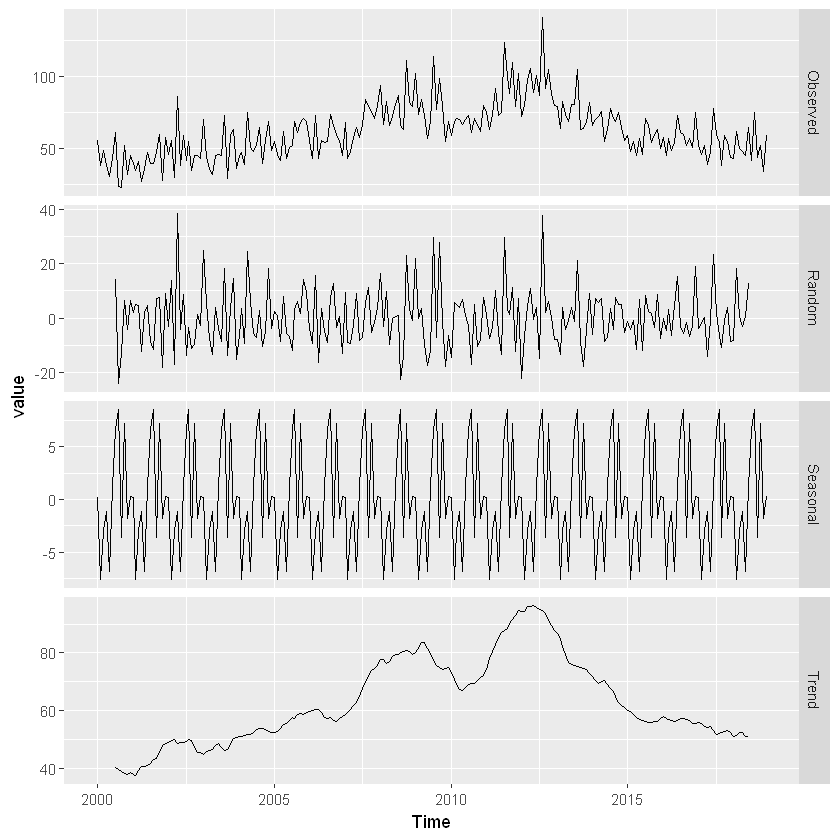

In [26]:
# plot decomposed time series frame
q <- ggplot(dat2, aes(Time, value)) +
    facet_grid(component ~ ., scales="free_y") +
    geom_line(size=0.5) #+
#     #labs(y=expression(Fatalities~of~Accidents), x="Time (Years)") +
#     labs(x='Year', y='Number of Fatalities in Road Traffic Accidents') +
# #     ggtitle(expression(Decomposed~RTA~time~series)) +
# #     theme_bw() +
# #     theme(plot.title=element_text(hjust=0.5))
#     theme_grey() +
#     theme(
#         #plot.title = element_text(color="blue", size=14, face="bold.italic",hjust = 0.5),
#         axis.title.x = element_text(size=12),
#         axis.text.x = element_text(lineheight = 0, angle = 0, vjust=0, hjust=-0.1),
#         axis.title.y = element_text(size=12)
#     )
q

In [27]:
ggsave('Decomposed.png', q, device='png', dpi=1200, limitsize=FALSE)

Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 6 rows containing missing values (geom_path)."

In [469]:
xmin <- seq(2000,2018,2)
ggplot() +
    facet_wrap(gather(dat, component, value, -Time), aes(Time, value), component ~ ., scales="free_y") +
    geom_line(gather(dat, component, value, -Time), aes(Time, value), col='blue', size=0.5) +
    #labs(y=expression(Fatalities~of~Accidents), x="Time (Years)") +
    labs(x='Year', y='Number of Fatalities in Road Traffic Accidents') +
#     ggtitle(expression(Decomposed~RTA~time~series)) +
#     theme_bw() +
#     theme(plot.title=element_text(hjust=0.5))
    theme_grey() +
    theme(
        #plot.title = element_text(color="blue", size=14, face="bold.italic",hjust = 0.5),
        axis.title.x = element_text(size=12),
        axis.text.x = element_text(lineheight = 0, angle = 0, vjust=0, hjust=-0.1),
        axis.title.y = element_text(size=12)
    )

Warning message:
"Only the first value of `nrow` will be used."Warning message:
"Coercing `nrow` to be an integer."

ERROR: Error in sanitise_dim(nrow): (list) object cannot be coerced to type 'integer'


In [450]:
df <- data.frame(x = rnorm(20),
                 y = runif(20),
                 facet = sample(c("A", "B"),
                                20,
                                replace = TRUE))
df

x,y,facet
-0.357615902,0.08661050,A
-2.249300745,0.90498928,A
0.002837861,0.19894589,B
1.283033216,0.97319802,A
-0.267299063,0.06459416,A
-0.717604576,0.45351959,B
-0.604157249,0.27298650,B
-1.394921621,0.22182555,B
-1.598624461,0.02343691,B
1.605976503,0.75214399,B


In [451]:
rect1 <- data.frame(xmin = -1,
                    xmax = 1,
                    ymin = -Inf,
                    ymax = Inf,
                    facet = c("A", "B"))
rect1

xmin,xmax,ymin,ymax,facet
-1,1,-Inf,Inf,A
-1,1,-Inf,Inf,B


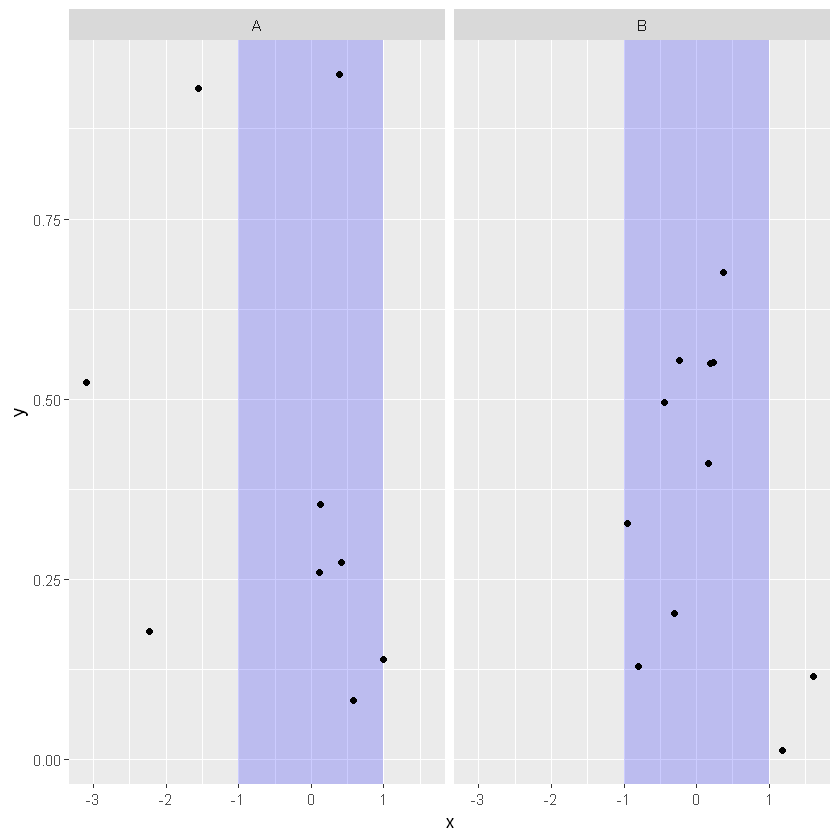

In [449]:
ggplot() + 
  geom_rect(data = rect1 , aes(xmin = xmin,
                               xmax = xmax,
                               ymin = ymin,
                               ymax = ymax),
            alpha = 0.2, fill = "blue") +
  geom_point(data = df, aes(x = x, y = y))+
  facet_wrap(~facet)

In [458]:
gather(dat, component, value, -Time)

Time,component,value
2000.000,Observed,56
2000.083,Observed,38
2000.167,Observed,49
2000.250,Observed,38
2000.333,Observed,31
2000.417,Observed,43
2000.500,Observed,61
2000.583,Observed,24
2000.667,Observed,23
2000.750,Observed,52
